## Árvores de regressão - Parte_02



| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np
import dtreeviz
import graphviz


boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)

y = pd.DataFrame(boston.target, columns = ['MEDV'])


In [3]:

X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:

y.sample(5)


,MEDV
351,24.1
373,13.8
418,8.8
21,19.6
243,23.7


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

arvore_1 = DecisionTreeRegressor(max_depth=8)

arvore_2 = DecisionTreeRegressor(max_depth=2)

arvore_1.fit(X_train, y_train)

arvore_2.fit(X_train, y_train)

mse_1 = arvore_1.score(X_train, y_train)

mse_2 = arvore_2.score(X_train, y_train)



### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

{'ccp_alphas': array([0.00000000e+00, 1.31926121e-05, 1.18733509e-04, 2.11081794e-04,
        3.29815303e-04, 3.29815303e-04, 3.29815303e-04, 5.32102023e-04,
        6.46437995e-04, 7.43183817e-04, 8.44327177e-04, 8.61917326e-04,
        1.31926121e-03, 1.31926121e-03, 1.59630607e-03, 1.93931398e-03,
        1.94283201e-03, 2.54177661e-03, 2.58575198e-03, 2.58575198e-03,
        2.96833773e-03, 3.37730871e-03, 3.44766931e-03, 3.74010554e-03,
        4.76253298e-03, 5.57387863e-03, 6.05892700e-03, 6.35004398e-03,
        7.14379947e-03, 7.39226033e-03, 7.44415128e-03, 9.04636261e-03,
        9.69656992e-03, 1.43667546e-02, 1.48636763e-02, 1.59630607e-02,
        1.61609499e-02, 1.74854881e-02, 1.80123131e-02, 1.82438120e-02,
        1.85795954e-02, 1.90501319e-02, 1.90501319e-02, 2.11081794e-02,
        2.11081794e-02, 2.17733069e-02, 2.20903694e-02, 2.43500021e-02,
        2.64127089e-02, 2.80512627e-02, 3.83189471e-02, 4.02249026e-02,
        4.84828496e-02, 5.56300046e-02, 5.74670185

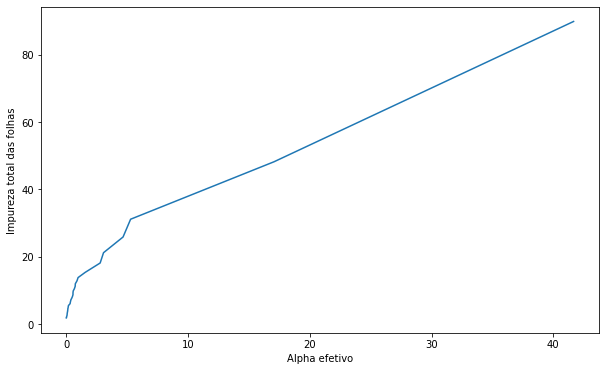

In [6]:

b_treino = arvore_1.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = b_treino.ccp_alphas, b_treino.impurities

plt.figure(figsize=(10, 6))

plt.plot(ccp_alphas, impurities)

plt.xlabel("Alpha efetivo")

plt.ylabel("Impureza total das folhas");

b_treino


### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

100

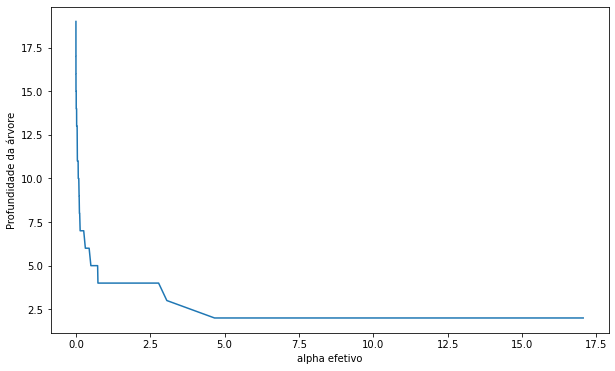

In [7]:
clfs = []

for ccp_alpha in ccp_alphas:
    
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    
    clf.fit(X_train, y_train)
    
    clfs.append(clf)
    
    tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(10,  6))

plt.plot(ccp_alphas[:-1], tree_depths[:-1])

plt.xlabel("alpha efetivo")

plt.ylabel("Profundidade da árvore");

len(tree_depths)


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [8]:

train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
    
test_scores  = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]
     

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

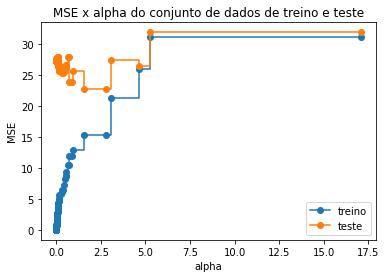

Escolha um valor de alpha perto do ponto de mínimo do MSE: Valor escolhido --> 2.5


In [9]:

fig, ax = plt.subplots()

ax.set_xlabel("alpha")

ax.set_ylabel("MSE")

ax.set_title("MSE x alpha do conjunto de dados de treino e teste")

ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",drawstyle="steps-post")

ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",drawstyle="steps-post")

ax.legend()

plt.show()

print('Escolha um valor de alpha perto do ponto de mínimo do MSE: Valor escolhido --> 2.5')


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [10]:

def ccp_alpha(var):

    result_r_quadrado = DecisionTreeRegressor(random_state=0, ccp_alpha=var)
    
    result_r_quadrado.fit(X_train, y_train)
    
    print(f"R-Quadrado_Base_Teste: {result_r_quadrado.score(X_test, y_test):.2f}")
    
ccp_alpha(2.5)


R-Quadrado_Base_Teste: 0.67


### 7. Visualize esta árvore.

Profundidade: 4
R-quadrado na base de testes: 0.67
MSE na base de teste: 22.70


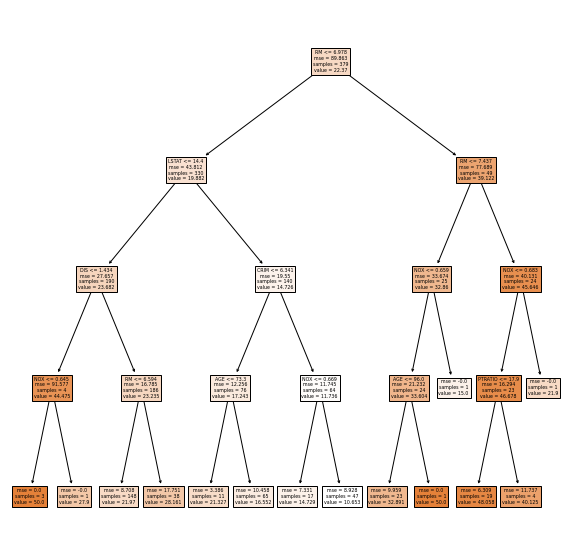

In [11]:

arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=2.5)

arvore_final.fit(X_train, y_train)

print(f"Profundidade: {arvore_final.tree_.max_depth}")

print(f"R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")

print(f"MSE na base de teste: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")

arvore_1 = DecisionTreeRegressor(max_depth=4)

arvore_1.fit(X_train, y_train)

plt.rc('figure', figsize=(10, 10))

tp = tree.plot_tree(arvore_1, feature_names=X.columns, filled=True) 

#graf_arv_1 = tree.export_graphviz(arvore_1, out_file=None, feature_names=X.columns,filled=True)

#plot_1 = graphviz.Source(graf_arv_1, format="png") 

#plot_1
